In [6]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "../data/mouse_drug_data.csv"
clinical_trial_data_to_load = "../data/clinicaltrial_data.csv"

In [11]:
# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load,encoding="UTF-8")
clinical_df = pd.read_csv(clinical_trial_data_to_load, encoding="UTF-8")
# Combine the data into a single dataset
combined_df = mouse_df.merge(clinical_df, how="outer",on ="Mouse ID")
combined_df.head()
# Display the data table for preview

Mouse ID      Drug  Timepoint  Tumor Volume (mm3)  Metastatic Sites
0     f234  Stelasyn          0           45.000000                 0
1     f234  Stelasyn          5           47.313491                 0
2     f234  Stelasyn         10           47.904324                 0
3     f234  Stelasyn         15           48.735197                 1
4     f234  Stelasyn         20           51.112713                 2

In [26]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
grouped = combined_df.groupby(["Drug","Timepoint"])
mean_tumor = grouped["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
tumor_df = pd.DataFrame(mean_tumor)
# Preview DataFrame
tumor_df.head()

Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [27]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_sem = grouped["Tumor Volume (mm3)"].sem()
# Convert to DataFrame
tumor_sem_df = pd.DataFrame(tumor_sem)
# Preview DataFrame
tumor_sem_df.head()


Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                    0.000000
          5                    0.448593
          10                   0.702684
          15                   0.838617
          20                   0.909731

In [33]:
# Minor Data Munging to Re-Format the Data Frames
reform_tumor_df = tumor_df.reset_index()
reformat_data = reform_tumor_df.pivot(index = "Timepoint", columns = "Drug", values = "Tumor Volume (mm3)")
reformat_data
# Preview that Reformatting worked

Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zoniferol  
Timepoint                                              
0          45.000000  45.000000  45.000000  45.000000  
5          47.248967  43.944859  47.527452  46.851818  
10         49.101541  42.531957  49.463844  48.689881  
15         51.067318  41.495061  51.529409  50.779059  
20         53.346737  40.238325  54.067395  53.170334  
25         55.504138  38.974300  56.166123  55.432935  
30         58.196374  38.703137  59.826738  57.713531  
35         60.350199  37.451996  62.440699  60.089372  
40         63.045537  36.574081  65.356386  62.916692  
45         66.258529  34.955595  68.438310  65.960888

No handles with labels found to put in legend.


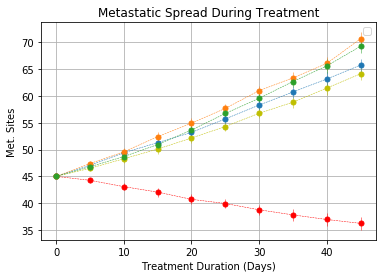

In [78]:
# Generate the Plot (with Error Bars)
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Met. Sites")
plt.grid(True)
plt.legend(loc="best")

plt.errorbar(reformat_data.index, reformat_data["Capomulin"], label = "Capomulin", yerr=tumor_sem["Capomulin"], color = "r",marker="o", markersize = 5, linestyle="dashed", linewidth = .5)
plt.errorbar(reformat_data.index, reformat_data["Ceftamin"], label = "Ceftamin", yerr=tumor_sem["Capomulin"], color = "y", marker="o", markersize = 5, linestyle="dashed", linewidth = .5)
plt.errorbar(reformat_data.index, reformat_data["Infubinol"], yerr=tumor_sem["Capomulin"], marker="o", markersize = 5, linestyle="dashed", linewidth = .5)
plt.errorbar(reformat_data.index, reformat_data["Ketapril"], yerr=tumor_sem["Capomulin"], marker="o", markersize = 5, linestyle="dashed", linewidth = .5)
plt.errorbar(reformat_data.index, reformat_data["Naftisol"], yerr=tumor_sem["Capomulin"], marker="o", markersize = 5, linestyle="dashed", linewidth = .5)
# Save the Figure

plt.show()